In [1]:
import numpy
from pandas import read_csv

from sklearn.metrics import mean_squared_error
from math import sqrt

from math import log, exp

from scipy.stats import boxcox
from pandas import DataFrame, Grouper, Series, concat

from pandas.plotting import lag_plot
from matplotlib import pyplot

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA, ARIMAResults

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.gofplots import qqplot

In [2]:
from google.colab import files
uploaded = files.upload()

Saving AirPassengers.csv to AirPassengers.csv


In [3]:
series = read_csv('/content/AirPassengers.csv', header=0, index_col=0, parse_dates=True)

print(series.head())

            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121


In [4]:
print(series.describe())

       #Passengers
count   144.000000
mean    280.298611
std     119.966317
min     104.000000
25%     180.000000
50%     265.500000
75%     360.500000
max     622.000000


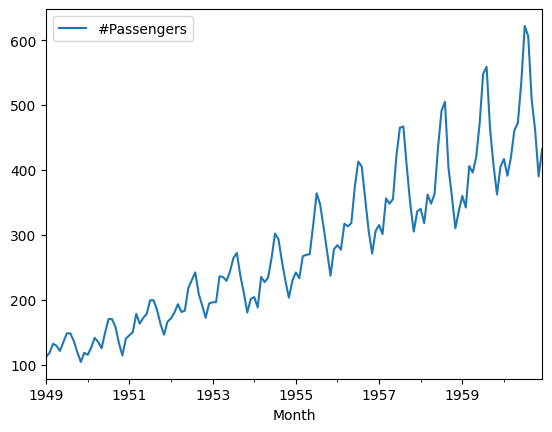

In [5]:
#visualisasi nilai pada plot garis, yang dapat memberikan banyak wawasan tentang masalah tersebut
series.plot()
pyplot.show()

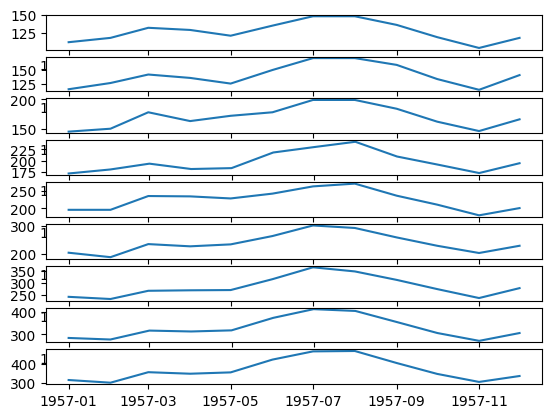

In [6]:
# konfirmasi asumsi dengan plot garis tahunan.
groups = series['1949':'1957'].groupby(Grouper(freq='A'))
years = DataFrame()
pyplot.figure()
i = 1
n_groups = len(groups)
for name, group in groups:
    pyplot.subplot((n_groups * 100) + 10 + i)
    i += 1
    pyplot.plot(group)
pyplot.show()


<ipython-input-7-ba521902c209>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  pyplot.subplot(212)


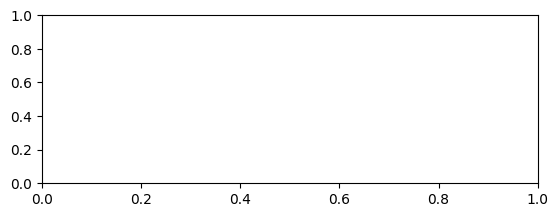

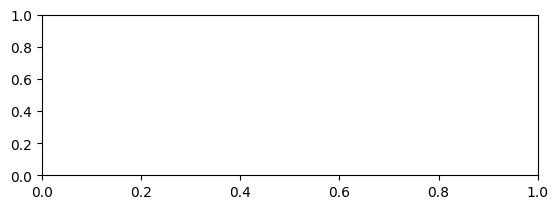

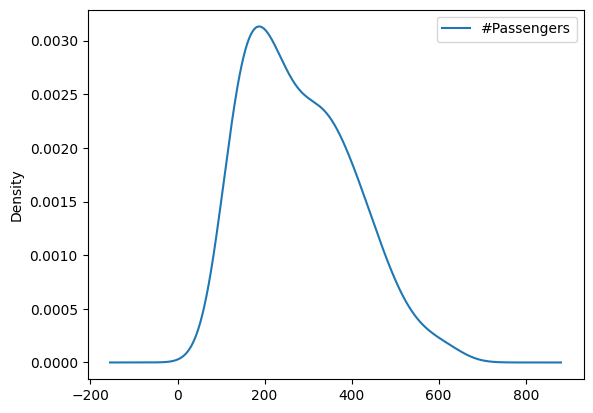

In [7]:
#Struktur Data
pyplot.figure(1)
pyplot.subplot(211)
series.hist()
pyplot.subplot(212)
series.plot(kind='kde')
pyplot.show()

<Axes: >

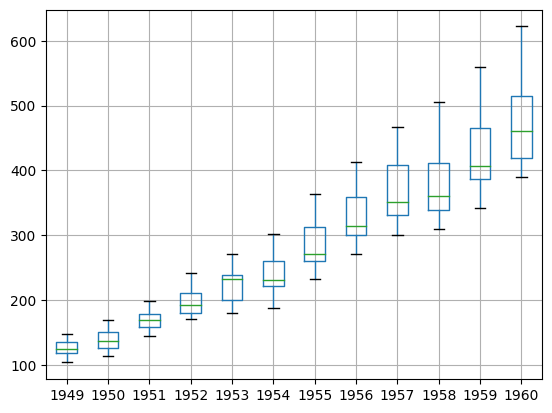

In [8]:
# Analisis data bulanan berdasarkan tahun dan gambaran tentang penyebaran observasi untuk setiap tahun.
groups = series['1949':'1960'].groupby(Grouper(freq='A'))
years = DataFrame()

for name, group in groups:
    years[name.year] = group.values.flatten()

years.boxplot()


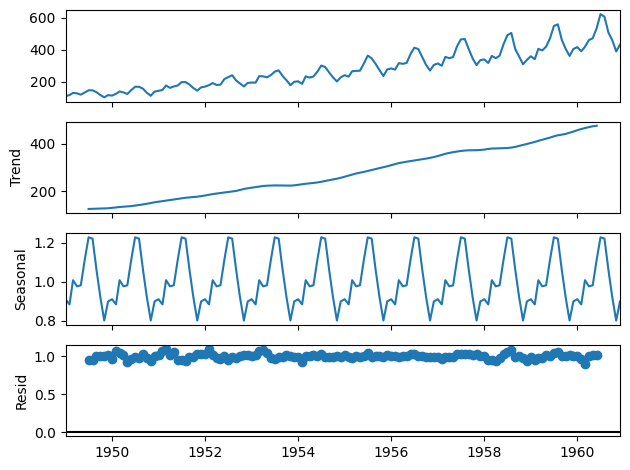

In [11]:
#uraikan deret waktu untuk kejelasan lebih lanjut tentang komponennya Level, Tren, Musiman, dan Kebisingan.
result = seasonal_decompose(series, model='multiplicative')
result.plot()
pyplot.show()

In [19]:
def test_stationarity(timeseries):
    # Determine rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()

    # Plot rolling statistics
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(movingAverage, color='red', label='Rolling Mean')
    plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    # Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    airpass_test = adfuller(timeseries['Passengers'], autolag='AIC')
    dfoutput = pd.Series(airpass_test[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in airpass_test[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

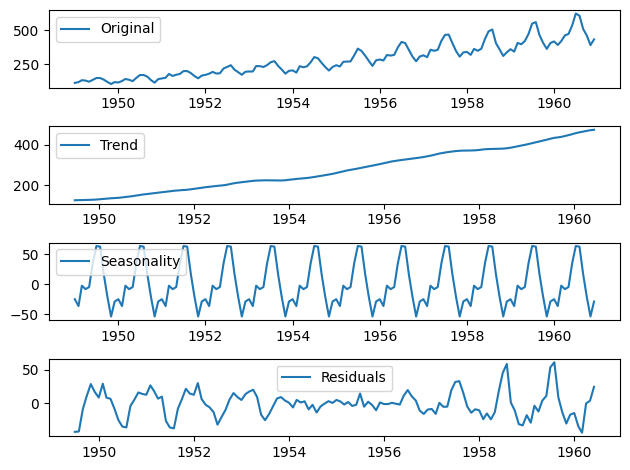

In [9]:
import matplotlib.pylab as plt
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(series)

trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid

plt.subplot(411)
plt.plot(series, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

In [12]:
decomp_data = residual
decomp_data = decomp_data.dropna()
print(decomp_data)

Month
1949-07-01   -42.622475
1949-08-01   -42.073232
1949-09-01    -8.478535
1949-10-01    11.059343
1949-11-01    28.593434
                ...    
1960-02-01   -34.186869
1960-03-01   -43.967172
1960-04-01    -0.296717
1960-05-01     3.756313
1960-06-01    24.555556
Name: resid, Length: 132, dtype: float64


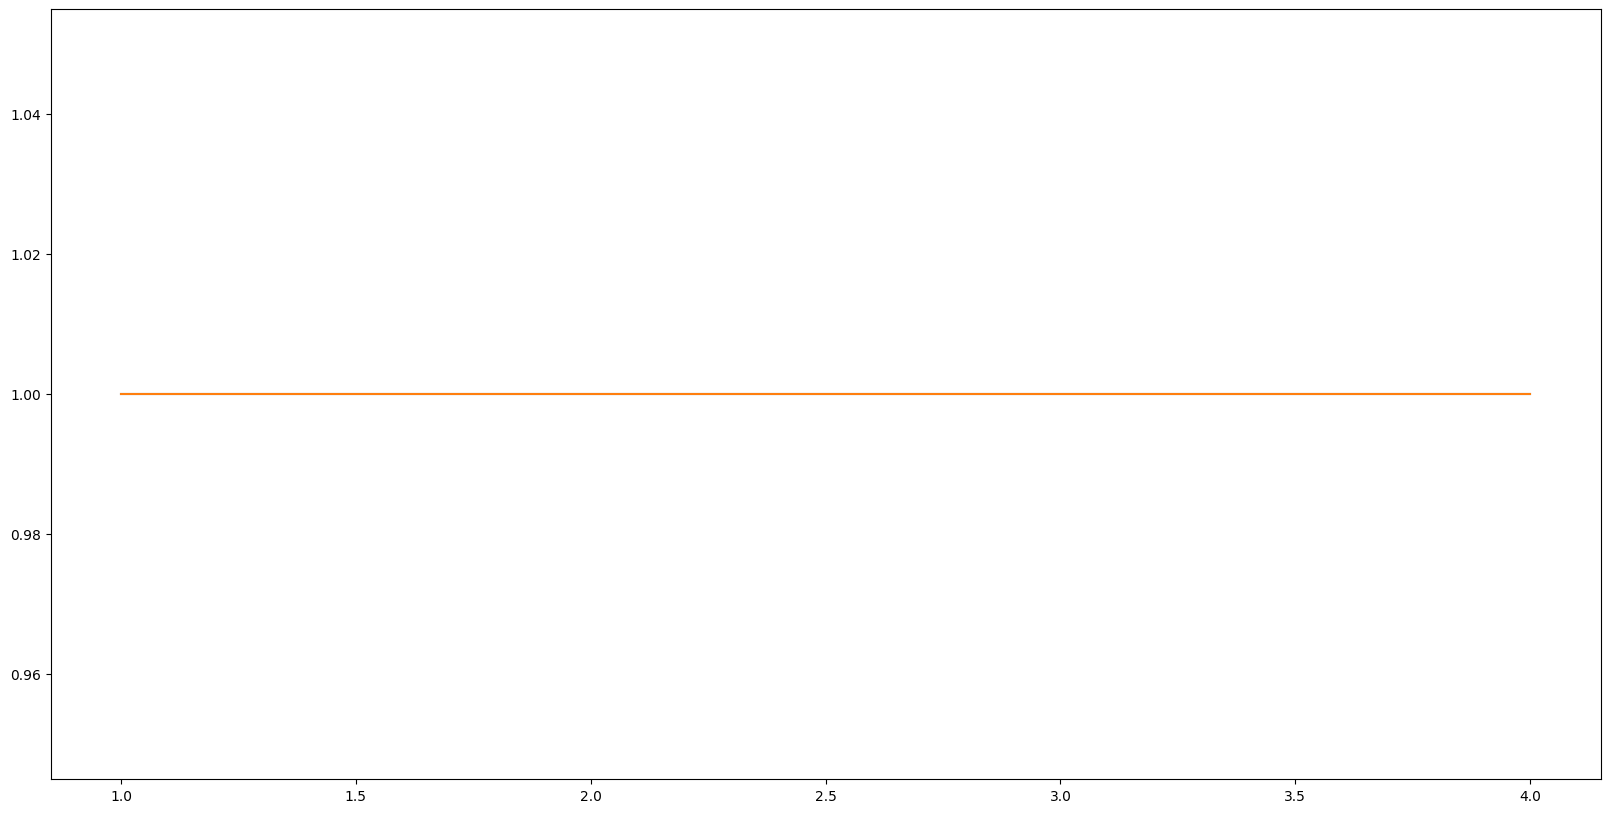

In [27]:
plt.figure(figsize=(20, 10))
data_shift = series - series.shift()
plt.plot(data_shift)
data_shift.dropna(inplace=True)
plt.plot(data_shift)
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Plotting MA model


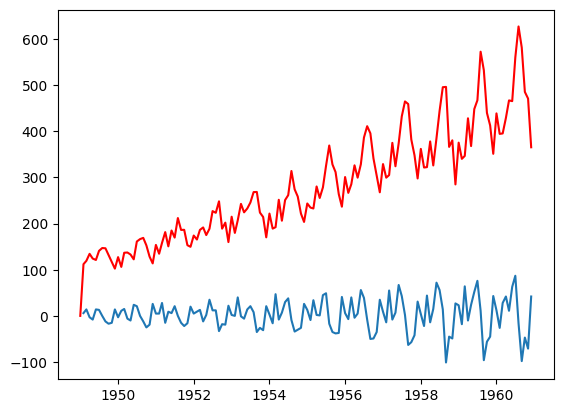

In [15]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

model2 = ARIMA(series, order=(0,1,2))
results_MA = model2.fit()

plt.plot(data_shift)
plt.plot(results_MA.fittedvalues, color='red')
# plt.title('RSS: %.4f' % sum((results_MA.fittedvalues - airpass_log_diff['Passengers'])**2))
print('Plotting MA model')
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Plotting ARIMA model


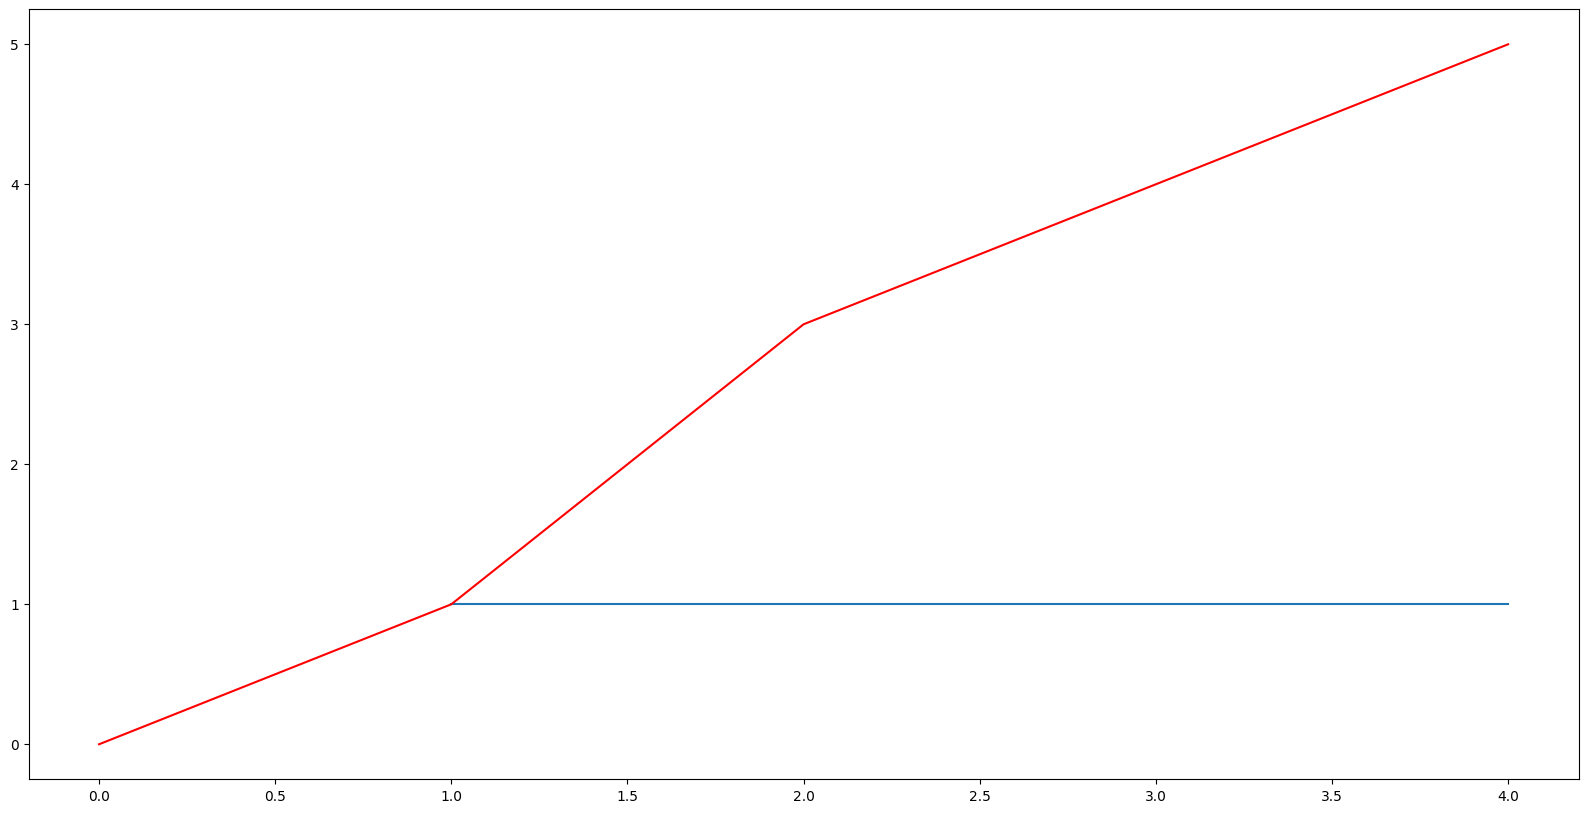

In [28]:
plt.figure(figsize=(20,10))
model = ARIMA(series, order=(2,1,2))
results = model.fit()
plt.plot(data_shift)
plt.plot(results.fittedvalues, color='red')
# plt.title('RSS: %.4f' % sum((results.fittedvalues - data_shift['Passengers'])**2))
print('Plotting ARIMA model')
plt.show()

In [29]:
predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

0    0.000000
1    1.000000
2    2.999983
3    3.999974
4    4.999983
dtype: float64

In [30]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

0     0.000000
1     1.000000
2     3.999983
3     7.999958
4    12.999940
dtype: float64

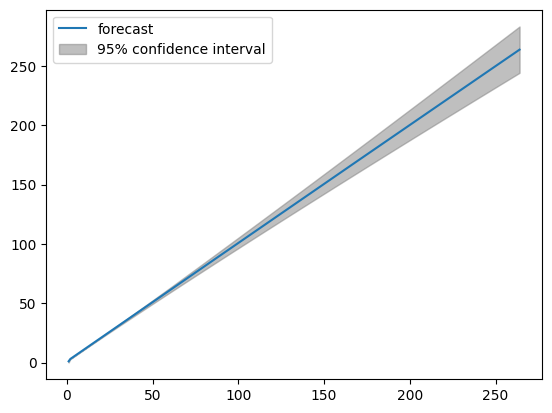

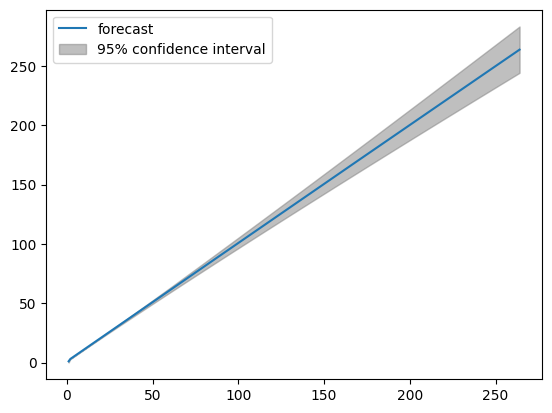

In [35]:
plot_predict(results, start=1, end=264)